In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/image/A_NIGHT_TO_REMEMBER_DISC01-07.jpg
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


Read all the datasets required

In [2]:
dataframe = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv('/kaggle/input/titanic/test.csv')


Start the data analysis part where one has to understand what we are dealing with 

In [3]:

dataframe.info()
print(dataframe.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


1. We have seen Float, int and object(string or character) data types our raw dataset. 
2. The dataframe has columns with integers and Float values at PassengerID, Survived, Age, Sibsp, Parch, Fare, Pclass
rest with object datatypes

# ** Data Analysis**
> Survival on this ship can be based on age, class and or the place they entered the ship 

Survival based on Sex


Percentage of Male on ship: 65
Percentage of Female on ship: 35


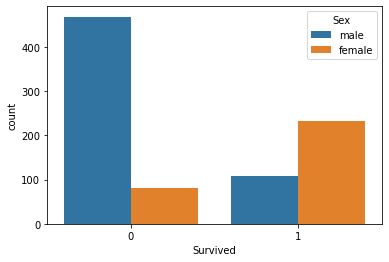

In [4]:
sns.countplot(dataframe['Survived'], hue = dataframe['Sex'])
Dead, lives = dataframe.Survived.value_counts()
male, female = dataframe.Sex.value_counts()
print("Percentage of Male on ship:", round(male/(male+female)*100) )
print("Percentage of Female on ship:", round(female/(male+female)*100 ))

* 65% of people on this sunked ship are males and rest are females
* Also by looking at the graph of survival against the sex, there are more females survived than the male and the death count is also high for the males.
* This shows the women are given the first seat at the rescue boats ..

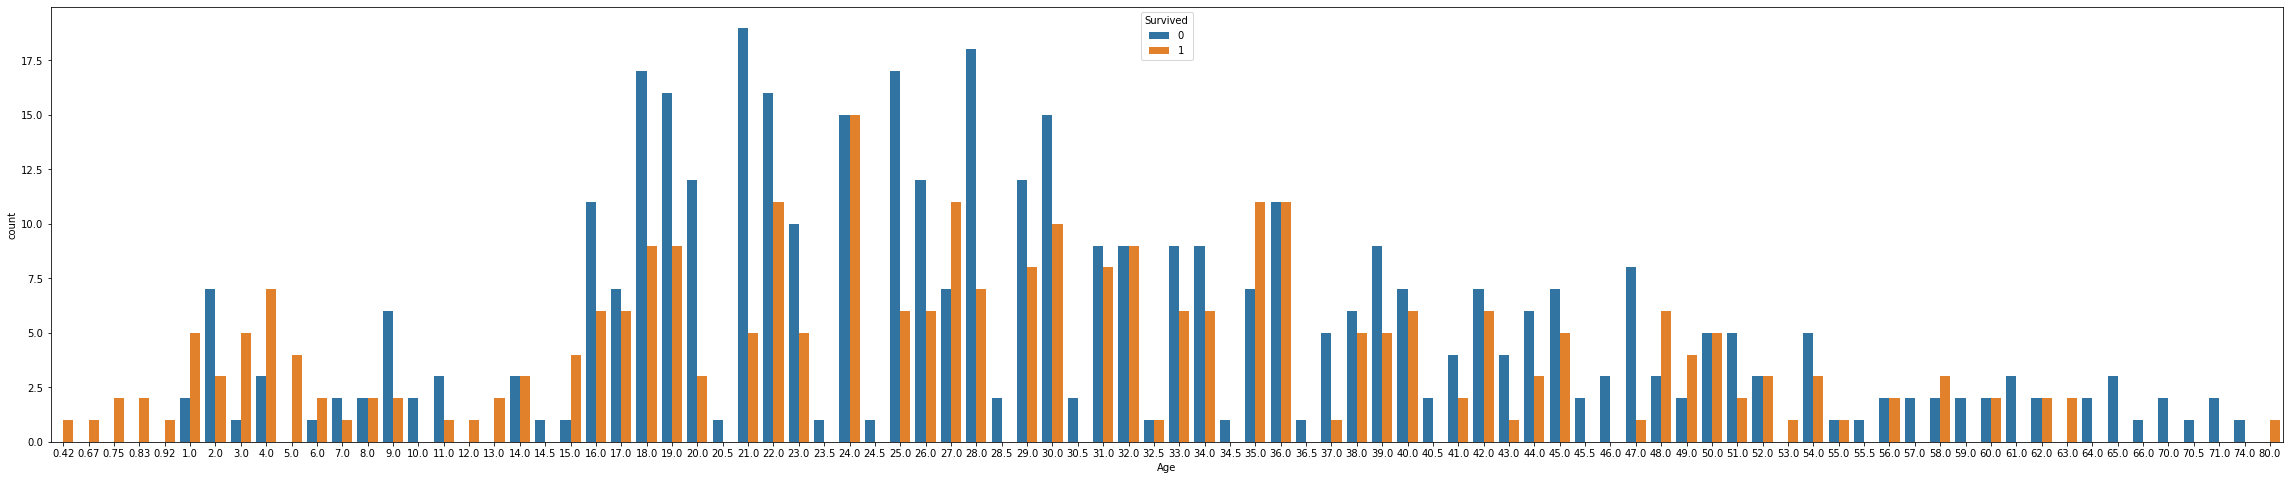

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(40,8))
sns.countplot(dataframe['Age'], hue = dataframe['Survived'])

*  The above graph of survival based on age is so obvious that the young and middle ages people from 16 to 40 has the highest death count as shown in blue bars on above graph 
* the people above 70 might have voluntarily chose to stay back on ship 
* The infants and kids are also saved as shown in above graph 


**# survived based on Passenger Class**

There are 3 passenger classes named as 1st, 2nd and 3rd class

In [6]:
#find out how many classes on ship
dataframe.Pclass.unique()
#so there are 3 classes on ship
dataframe.Pclass.value_counts()
#in which 1st, 2nd and 3rd class has 216, 184 and 491 respectively 
#The graph shows the most people died in 3rd class which is obvious from the
#number of people who bought 3rd class tickets are high


3    491
1    216
2    184
Name: Pclass, dtype: int64

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


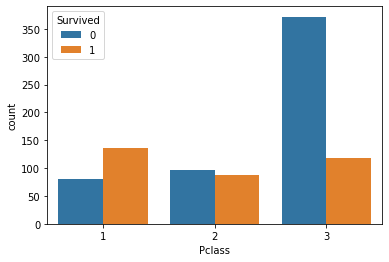

In [7]:
sns.countplot(dataframe['Pclass'], hue = dataframe['Survived'])
t_p = dataframe.groupby('Pclass')['Survived']
print(t_p.sum())

* although the class 1 and 2 has almost equal survival and death counts(class 1 has more survivals better than 2 as class 1 are "rich" people )
* on the other hand class 3 has most death count

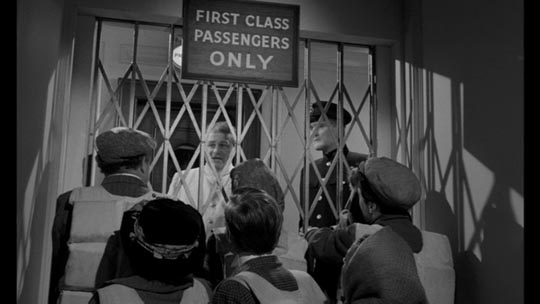


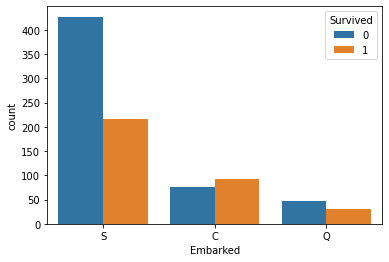

In [8]:
#The Embarked class does not give much info other than S class embarkment has ppl from all different classes
sns.countplot(dataframe['Embarked'], hue = dataframe['Survived'])

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

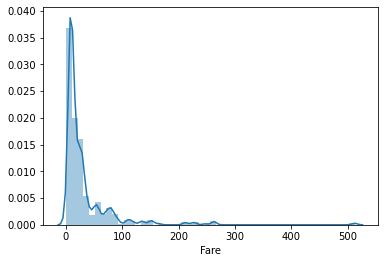

In [9]:
sns.distplot(dataframe['Fare'])
dataframe['Fare'].describe()

# To fill the missing values in different columns starting with age

In [10]:
#find the null values in different columns first 
#Find the null values if any in our DataFrame
dataframe.isnull().values.any()
dataframe.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have to deal with missing values in Age, Cabin and Embarked
The Cabin data is not that helpful because when ship sinks everyone has to get out of their bunkers. phewwwwww 
The Age can be replaced by simple mean of ages of all people

In [11]:
#for test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
dataframe['Age'].fillna(round(dataframe['Age'].mean()), inplace = True)
test['Fare'].fillna(test['Fare'].mean(), inplace = True)
#doing the same for Test
test['Age'].fillna(round(test['Age'].mean()), inplace = True)


Check again for missing data after filling the age column

In [13]:
dataframe.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [15]:
dataframe['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    30.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

* The columns Name and Cabin has unique values so dropping it might be a good idea. 
* Same with Test data

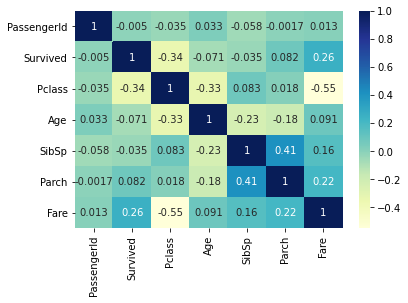

In [16]:
import seaborn as sns
correlations = dataframe[dataframe.columns].corr(method='pearson')
sns.heatmap(correlations, cmap="YlGnBu", annot = True)

In [17]:
import heapq

print('Absolute overall correlations')
print('-' * 30)
correlations_abs_sum = correlations[correlations.columns].abs().sum()
print(correlations_abs_sum, '\n')

print('Weakest correlations')
print('-' * 30)
print(correlations_abs_sum.nsmallest(4))

Absolute overall correlations
------------------------------
PassengerId    1.145007
Survived       1.788403
Pclass         2.354376
Age            1.936804
SibSp          1.982859
Parch          1.913116
Fare           2.285972
dtype: float64 

Weakest correlations
------------------------------
PassengerId    1.145007
Survived       1.788403
Parch          1.913116
Age            1.936804
dtype: float64


In [18]:
train_set = dataframe.drop( ['Name','Cabin', 'Ticket','PassengerId', ], axis = 1)
test_set = test.drop( ['Name','Cabin', 'Ticket', 'PassengerId', ], axis = 1)


Also we had 2 missing values in Training set Embarked column


In [19]:
test_set.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
train_set['Embarked'].fillna(train_set['Embarked'].mode()[0], inplace = True)


In [21]:
#train_set = train_set.dropna()
#test_set = test_set.dropna()

1. Selecting the dependent and Independent variables 
Survival being the dependent and rest of the data as independent variables

In [22]:
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [23]:
test_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [24]:
y = train_set.iloc[:, 0].values
X = train_set.iloc[:, train_set.columns != 'Survived'].values
print(X[0])

[3 'male' 22.0 1 0 7.25 'S']


* Now we deal with categrical data in Train and Test set using LabelEncoder and OneHOtEncoder
* Columns with Sex and Embarkment

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[2])

[0.0 0.0 1.0 3 'female' 26.0 0 0 7.925]


In [26]:
#for test
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
test_set = np.array(ct.fit_transform(test_set))
print(test_set[1])


[0.0 0.0 1.0 3 'female' 47.0 1 0 7.0]


Applying LabelEncoder to Sex Column

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 4 ] = le.fit_transform(X[:,4])

print(X[1])


[1.0 0.0 0.0 1 0 38.0 1 0 71.2833]


In [28]:
#for test set
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_set[:, 4] = le.fit_transform(test_set[:,4])
print(test_set[2])

[0.0 1.0 0.0 2 1 62.0 0 0 9.6875]


# Splitting the training set and test set as X_train and X_test

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20 )

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =sc.transform(X_test)

# Now implementing various classification models

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import Ridge

rfc=RandomForestClassifier()
parameters= {'n_estimators':[ 100,200,300,400, 600],
             'max_depth':[3,4,6,7],
             'criterion':['entropy','gini']
    }

rfc=GridSearchCV(rfc, param_grid=parameters, cv = 5)
rfc.fit(X_train,y_train)
print("The best value of leanring rate is: ",rfc.best_params_, )

The best value of leanring rate is:  {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 200}


In [32]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion= 'gini', n_estimators = 100 ,max_depth = 6, random_state = 0)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
Random_forest_acc= accuracy_score(y_test, y_pred)
print('acc = ', Random_forest_acc )


acc =  0.8379888268156425


In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
LogisticReg_acc= accuracy_score(y_test, y_pred)
print('acc = ', LogisticReg_acc )

acc =  0.770949720670391


In [34]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X, y)
y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score, confusion_matrix
SVC_acc = accuracy_score(y_test, y_pred)
print('acc = ', SVC_acc )

acc =  0.6201117318435754


In [35]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)
y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score, confusion_matrix
Gaussian_acc = accuracy_score(y_test, y_pred)
print('acc = ', Gaussian_acc )

acc =  0.40782122905027934


In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score, confusion_matrix
DT_acc = accuracy_score(y_test, y_pred)
print('acc = ', DT_acc )


acc =  0.776536312849162


In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import Ridge

gbc=GradientBoostingClassifier()
parameters= {'n_estimators':[ 50,100,200,300, ],
             'max_depth':[3,4,6,7]
    }

gbreg=GridSearchCV(gbc, param_grid=parameters, cv = 5 )
gbreg.fit(X_train,y_train)
print("The best value of leanring rate is: ",gbreg.best_params_, )

The best value of leanring rate is:  {'max_depth': 3, 'n_estimators': 200}


In [38]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators = 100, max_depth =4, random_state = 42)
model_gb.fit(X_train, y_train)
y_pred = model_gb.predict(X_test)


from sklearn.metrics import accuracy_score, confusion_matrix
GB_acc = accuracy_score(y_test, y_pred)
print('acc = ', GB_acc )

acc =  0.8212290502793296


In [39]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
xgb_acc = accuracy_score(y_pred, y_test)
print('acc=',xgb_acc)

acc= 0.7653631284916201


In [40]:
print('RF_acc=', Random_forest_acc)
print('Logistic_acc=', LogisticReg_acc)
print('SVC_acc=', SVC_acc)
print('Gaussian_acc=', Gaussian_acc)
print('DecisionTree_acc=', DT_acc)
print('GradBoost_acc=', GB_acc)
print('XGBoost_acc=', xgb_acc)


RF_acc= 0.8379888268156425
Logistic_acc= 0.770949720670391
SVC_acc= 0.6201117318435754
Gaussian_acc= 0.40782122905027934
DecisionTree_acc= 0.776536312849162
GradBoost_acc= 0.8212290502793296
XGBoost_acc= 0.7653631284916201




* Now test the gradient boost on Test dataset

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion= 'gini', n_estimators = 100 ,max_depth = 6, random_state = 0)
rf_model.fit(X, y)


final_pred = rf_model.predict(test_set)

final_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Final Submission

In [42]:
survivors = pd.DataFrame(final_pred, columns = ['Survived'])
len(survivors)
survivors.insert(0, 'PassengerId', test['PassengerId'], True)
survivors

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [43]:
survivors.to_csv('Submission.csv', index = False)

**Please upvote if you like this notebook**